# Appendix

## Prepare notebook

Import libraries 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import weightedcalcs as wc

In [4]:
with open('../data/processed/df.pickle', 'rb') as file:
    df = pickle.load(file)

Set up function for weighting observations

In [5]:
weight = df['weight']
calc = wc.Calculator('weight')

## Party identification 

<br>
<b>Generally speaking, do you think of yourself as a ...?</b>
    <br>(Party identification)

Calculate weighted distribution of responses to 'Generally speaking, do you think of yourself as a ...?'

In [6]:
party_freq_series = calc.distribution(df, 'pid3_2016').round(3)
party_list = ['Democrat', 'Republican', 'Independent', 'Other', 'Not Sure']
party_freq_dict = dict(party_freq_series)
for ind, val in enumerate(party_freq_dict.values()):
    print(party_list[ind], val)

Democrat 0.36
Republican 0.294
Independent 0.296
Other 0.018
Not Sure 0.031


Plot weighted frequency of survey responses by response category

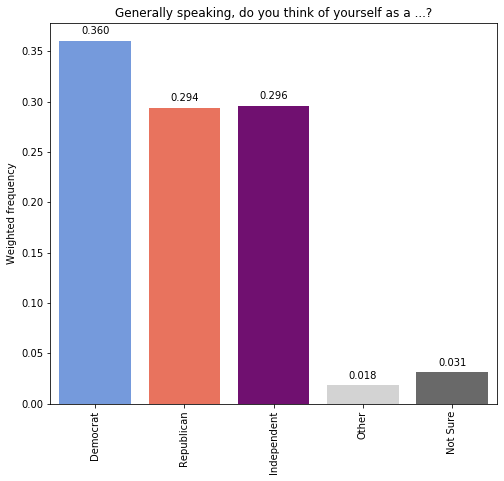

In [7]:
clrs_party = ['cornflowerblue', 'tomato', 'purple', 'lightgrey', 'dimgrey']
plt.figure(figsize=(8, 7))
bar_plot = sns.barplot(x=party_list,
                       y=list(party_freq_series),
                       palette=clrs_party)
bar_plot.set_xticklabels(rotation=90, labels=party_list)
bar_plot.set_title('Generally speaking, do you think of yourself as a ...?')
bar_plot.set_ylabel('Weighted frequency')
# add labels to bars
for bar in bar_plot.patches:
    bar_plot.annotate(format(bar.get_height(), '.3f'), (bar.get_x() + bar.get_width() / 2.,
                                                        bar.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Which <b>features</b> are correlated with <i>party</i>?

In [8]:
df.corr()['pid3_2016'].sort_values(ascending=False).head(10)

pid3_2016            1.000000
post_pid3_2012       0.702563
pid3_baseline        0.578848
pid7_2016            0.504512
post_pid7_2012       0.455840
pp_demprim16_2016    0.455295
pid7_baseline        0.438591
fav_hrc_2016         0.423551
obamaapp_2016        0.407291
fav_obama_2016       0.379822
Name: pid3_2016, dtype: float64

## Climate change

In [9]:
climate_freq = calc.distribution(df, 'imiss_l_2016').round(3)
print('weighted frequency:', climate_freq)

weighted frequency: imiss_l_2016
1.0    0.374
2.0    0.235
3.0    0.170
4.0    0.195
8.0    0.025
Name: weight, dtype: float64


[0.374, 0.235, 0.17, 0.195, 0.025]


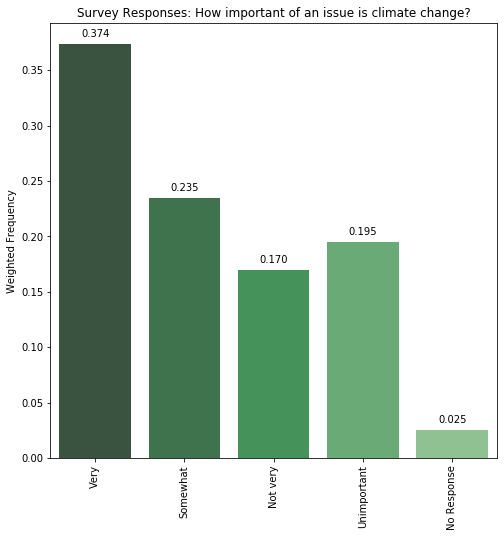

In [10]:
climate_list = []
for i in climate_freq:
    climate_list.append(i)
print(climate_list)
plt.figure(figsize=(8,8))
x = ['Very','Somewhat','Not very','Unimportant','No Response']
bplot = sns.barplot(x = x, y = climate_list, palette='Greens_d')
bplot.set_xticklabels(rotation=90, labels= x)
bplot.set_title('Survey Responses: How important of an issue is climate change?')
bplot.set_ylabel('Weighted Frequency')
for p in bplot.patches:
 bplot.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
            xytext = (0, 10), textcoords = 'offset points')
plt.show()